In [1]:
import pandas as pd
import numpy as np
import sys
import os

LOAD DATA

In [2]:
#os.chdir('../meters')
os.getcwd()
data = pd.read_csv('C:/Users/luiss/Python Process Control/Github Folder/Project/Project/Data/RawData1.csv',encoding='latin1').dropna()
data=pd.DataFrame(data)
data.head()



,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
1,2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
2,3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
3,4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
4,5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


In [3]:
 #2. Check for missing values in the dataset. Ans? There is not.
data.isnull().sum().sum()

0

In [4]:
 #3. Check for zeros values in the dataset. Yes They are. Questions? Two models ine with zeros and another with 

data.eq(0).any()

Unnamed: 0    False
XMEAS1         True
XMEAS2        False
XMEAS3        False
XMEAS4        False
XMEAS5        False
XMEAS6        False
XMEAS7        False
XMEAS8        False
XMEAS9        False
XMEAS10       False
XMEAS11       False
XMEAS12       False
XMEAS13       False
XMEAS14       False
XMEAS15       False
XMEAS16       False
XMEAS17       False
XMEAS18       False
XMEAS19        True
XMEAS20       False
XMEAS21       False
XMEAS22       False
XMEAS23       False
XMEAS24       False
XMEAS25       False
XMEAS26       False
XMEAS27       False
XMEAS28       False
XMEAS29       False
XMEAS30       False
XMEAS31       False
XMEAS32       False
XMEAS33       False
XMEAS34       False
XMEAS35       False
XMEAS36       False
XMEAS37       False
XMEAS38       False
XMEAS39       False
XMEAS40       False
XMEAS41       False
XMV1          False
XMV2          False
XMV3           True
XMV4          False
XMV5           True
XMV6          False
XMV7          False
XMV8          False


In [5]:
 #3. Check for zeros values in the dataset. 
#Note: We could fill with average the 0 values when there is 1 3 or 5. and avoid a negative skew

In [6]:
 #4. Split the data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split(data,train_size=0.8, test_size=0.2, random_state=60)
validation_data, test_data = train_test_split(test_data,train_size=0.50, test_size=0.50, random_state=60)

print(f'Length of framework is: {len(data)}\n',
      f'Length of training data is: {len(train_data)}\n',
      f'Length of test data is: {len(test_data)}\n',
      f'Length of validation data is: {len(validation_data)}\n')

Length of framework is: 1995
 Length of training data is: 1596
 Length of test data is: 200
 Length of validation data is: 199



In [7]:
from sklearn.preprocessing import MinMaxScaler
Norm =MinMaxScaler()
train_data_normalized=pd.DataFrame(Norm.fit_transform(train_data))
validation_data_normalized=pd.DataFrame(Norm.fit_transform(validation_data))
testing_data_normalized=pd.DataFrame(Norm.fit_transform(test_data))


c:\Users\luiss\anaconda3\envs\myenv3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 1.0, 'UMAP')

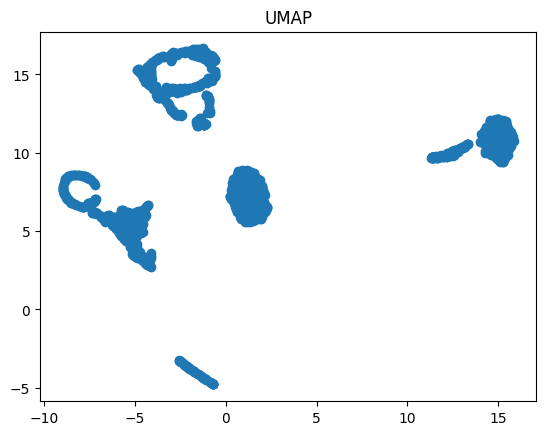

In [8]:
from umap import UMAP
#import plotly.express as px
import matplotlib.pyplot as plt

UMAP_normal = UMAP (n_components= 2)

train_UMPA = UMAP_normal.fit_transform(train_data_normalized)
val_UMAP=UMAP_normal.fit_transform(validation_data_normalized)
test_UMAP=UMAP_normal.fit_transform(testing_data_normalized)



plt.scatter(train_UMPA[:,0], train_UMPA[:,1])
plt.title("UMAP")



c:\Users\luiss\anaconda3\envs\myenv3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\luiss\anaconda3\envs\myenv3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\luiss\anaconda3\envs\myenv3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an undersco

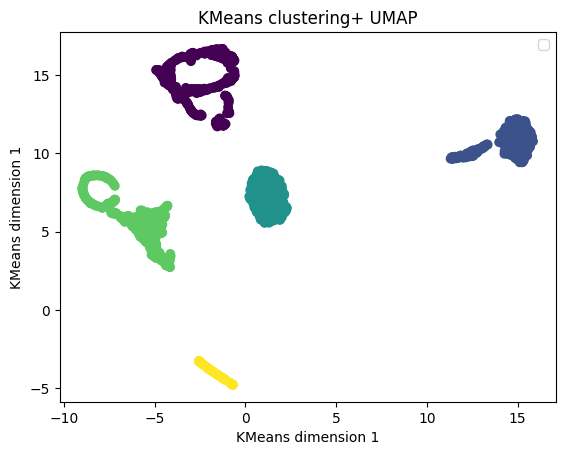

In [9]:
# Clustering
from sklearn.cluster import KMeans

# Instantiate KMeans object
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit and predict clusters
y_kmeans = kmeans.fit_predict(train_UMPA)
y_kmeans_val= kmeans.fit_predict(val_UMAP)
y_kmeans_test = kmeans.fit_predict(test_UMAP)



plt.scatter(train_UMPA[:, 0], train_UMPA[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans clustering+ UMAP')
plt.xlabel("KMeans dimension 1")
plt.ylabel("KMeans dimension 1")
plt.legend()
plt.show()



In [10]:
#Match my Labels with Luis Labels
matching = {1: 8, 0: 3, 2: 2, 3: 13, 4: 6}

new_k_means_training = np.zeros(y_kmeans.shape, dtype='float')  
for key, value in matching.items():
    new_k_means_training[y_kmeans == key] = value

new_k_means_val = np.zeros(y_kmeans_val.shape, dtype='float')  
for key, value in matching.items():
    new_k_means_val[y_kmeans_val == key] = value

new_k_means_test = np.zeros(y_kmeans_test.shape, dtype='float')  
for key, value in matching.items():
    new_k_means_test[y_kmeans_test == key] = value

In [11]:

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
score = silhouette_score(train_UMPA,y_kmeans,metric='euclidean')
db_index = davies_bouldin_score(train_UMPA,y_kmeans)
print("Davies is:",db_index , " Silouette is", score)

Davies is: 0.30758553423984464  Silouette is 0.7713615


In [12]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
score = silhouette_score(train_UMPA,new_k_means_training,metric='euclidean')
db_index = davies_bouldin_score(train_UMPA,new_k_means_training)
print("Davies is:",db_index , " Silouette is", score)


Davies is: 0.3075855342398447  Silouette is 0.7713615


Training a supervised SVC model using the labels obtained in unsupervised

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVC_Model = SVC(kernel='poly')
SVC_Model.fit(train_data,new_k_means_training)

# Predict the test set labels
y_pred = SVC_Model.predict(train_data)

accuracy_score(new_k_means_training, y_pred, normalize=True, sample_weight=None)

0.9216791979949874

Validation. (Stage 2). Calculate news Y using the model and compare with existing labels

In [31]:
y_pred_val = SVC_Model.predict(validation_data)

accuracy_score(new_k_means_val,y_pred_val, normalize=True, sample_weight=None)


0.5577889447236181

Improve Hyperparameters using grid

In [35]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

#SVC_Model = SVC()
grid_search = GridSearchCV(SVC_Model, param_grid, cv=5)
grid_search.fit(validation_data, new_k_means_val)

print("Best Parameters:", grid_search.best_params_)
print("Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Validation Score: 0.9346153846153846


In [36]:
y_pred_opt = grid_search.predict(validation_data)
accuracy_score(new_k_means_val, y_pred_opt, normalize=True, sample_weight=None)

1.0

In [37]:
#Testing
y_pred_opt_test = grid_search.predict(test_data)
accuracy_score(new_k_means_test, y_pred_opt_test, normalize=True, sample_weight=None)

0.425

In [41]:
#Testing luis_data
y_pred_opt_final = grid_search.predict(data)
y_pred_opt_final


array([2., 2., 2., ..., 3., 3., 3.])

In [40]:
#comparar vs labels de luis Briceno

labels_Luis = pd.read_csv('RawData_Label1.csv')
LL=labels_Luis['label'].to_numpy(dtype='float')
accuracy_score(y_pred_opt_final,LL, normalize=True, sample_weight=None)

0.14385964912280702